<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/Clust1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

[[ 0.43859488  0.21531641]
 [-0.42245291 -0.30543974]
 [-1.01248118  0.0475593 ]
 ...
 [ 0.02821554 -0.55498475]
 [ 0.94723713  0.26827243]
 [ 0.0656399   0.55372489]]
[1 1 0 ... 1 0 1]
[[ 0.06492798  0.14921409]
 [ 1.29497185 -0.45712996]
 [ 0.03399991  0.93749179]
 ...
 [ 1.73315562 -0.2495898 ]
 [ 0.98678928  0.11018118]
 [ 0.25003645 -0.10252756]]
[1 1 0 ... 1 0 1]
[[ -6.11119721   1.47153062]
 [ -7.49665361   0.9134251 ]
 [-10.84489837  -7.55352273]
 ...
 [  1.64990343  -0.20117787]
 [  0.79230661   0.60868888]
 [  1.91226342   0.25327399]]
[1 1 0 ... 2 2 2]
[[-3.37561542  3.63236314]
 [-3.61882807  3.78627892]
 [-3.48552993  0.46412084]
 ...
 [ 1.17962827 -1.54262502]
 [-0.49738132  0.78227797]
 [ 1.13089877 -1.13033403]]
[1 1 0 ... 2 2 2]
[[-5.19811282e+00  6.41869316e-01]
 [-5.75229538e+00  4.18627111e-01]
 [-1.08448984e+01 -7.55352273e+00]
 ...
 [ 1.36105255e+00 -9.07491863e-01]
 [-3.54141108e-01  7.12241630e-01]
 [ 1.88577252e+00  1.41185693e-03]]
[1 1 0 ... 2 2 2]
[[0.052645

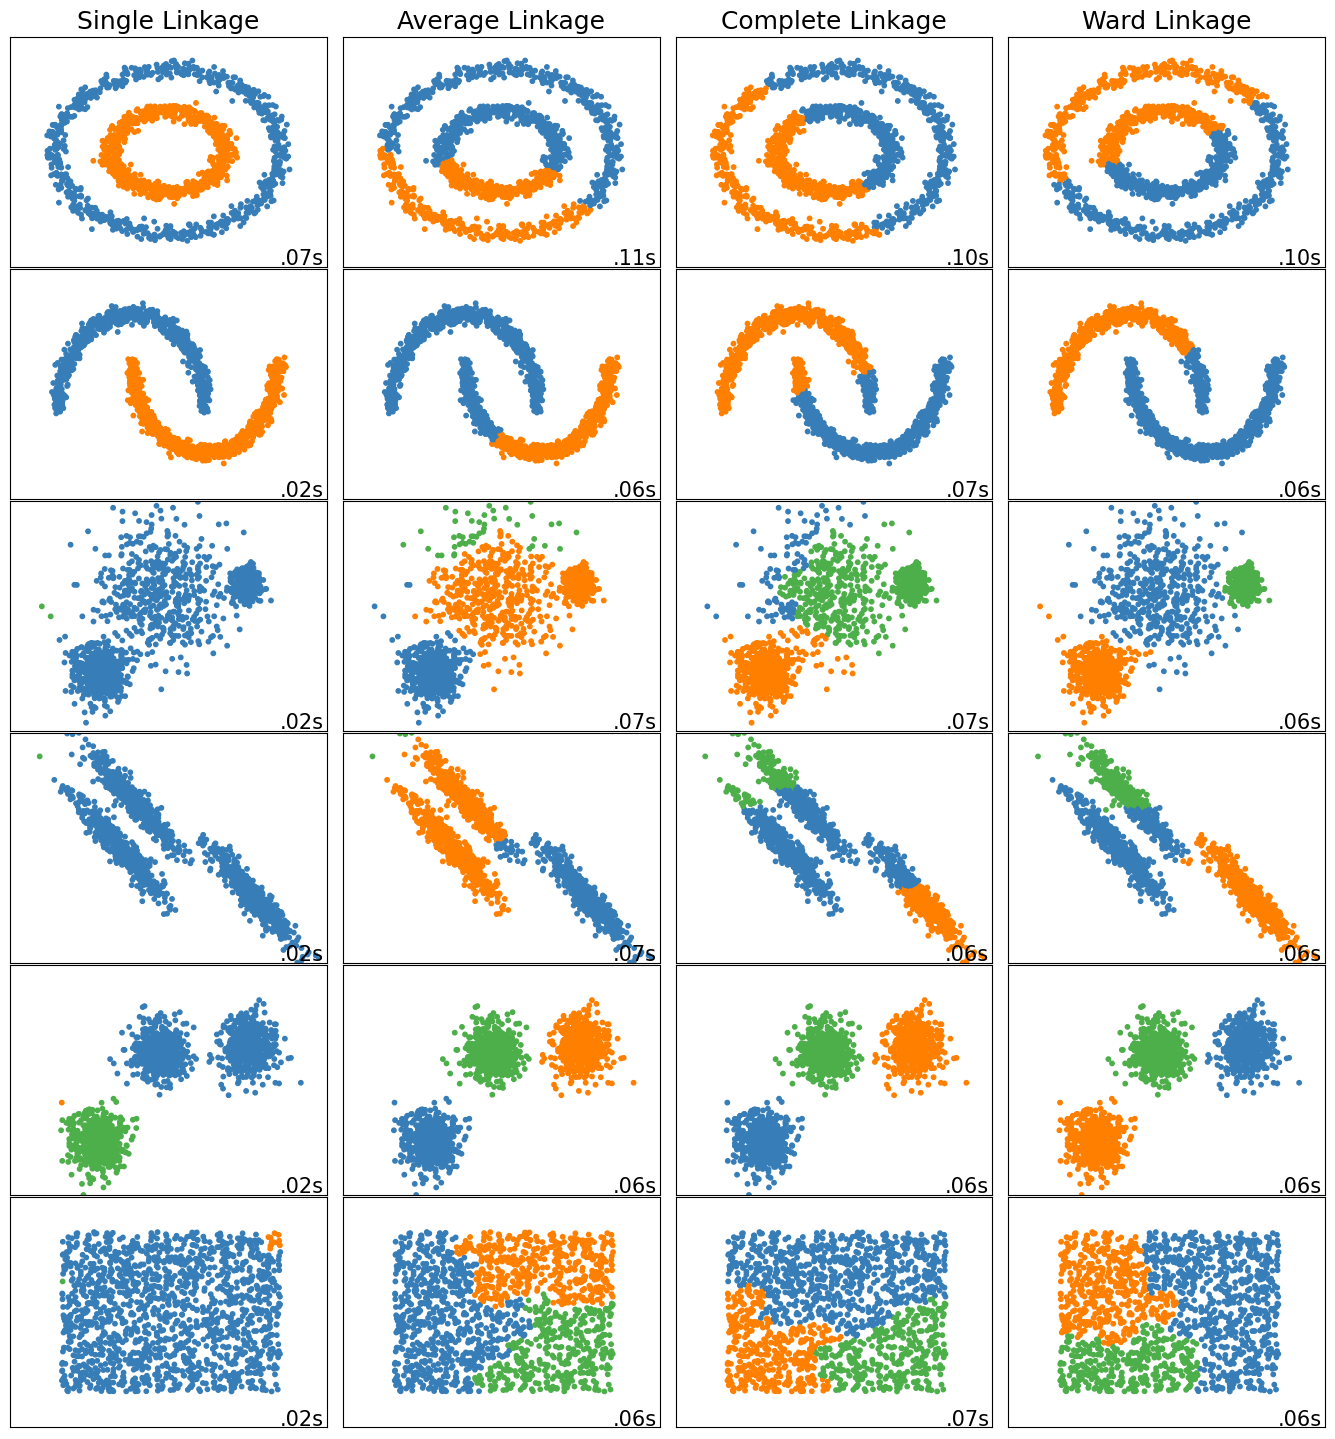

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}



datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    print(X)
    print(y)
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [ ]:
length = 500
noise_level = 0.5
offset = 2

x1 = np.arange(length)
y1 = np.zeros(length) + noise_level * np.random.randn(length)
ans1 = np.ones((1, 500), dtype=int)

In [ ]:
length = 500
noise_level = 0.5

x2 = np.arange(250, 750)
y2 = np.zeros(length) + offset + noise_level * np.random.randn(length)
ans12 = np.zeros((1, 500), dtype=int)

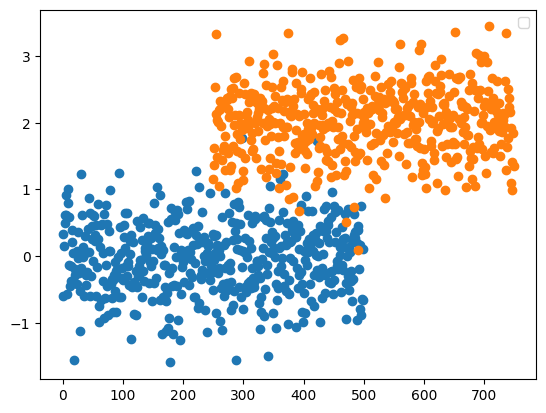

In [ ]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.legend()
plt.show()

In [ ]:
type(y1)

numpy.ndarray

In [ ]:
import random

In [ ]:
data = np.concatenate((y1, y2))
#random.shuffle(data)
x = np.concatenate((x1, x2))
len(data)

1000

In [ ]:
ans = np.concatenate((ans1, ans12))

In [ ]:
Data = np.column_stack((data, x))

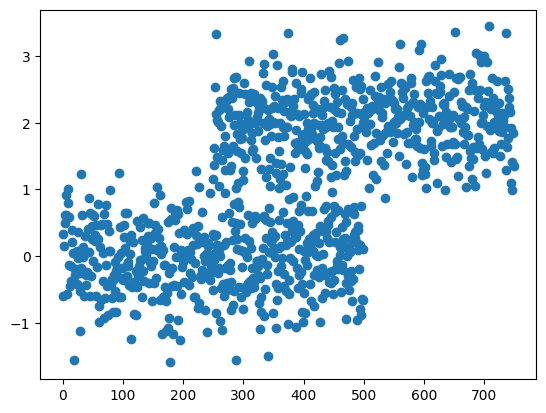

In [ ]:
plt.scatter(Data[:, 1], Data[:, 0])

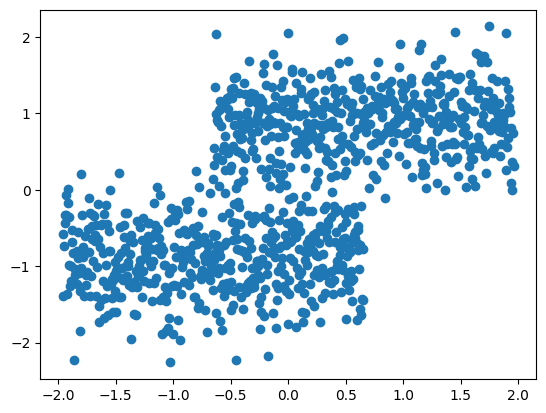

In [ ]:
Data = StandardScaler().fit_transform(Data)
plt.scatter(Data[:, 1], Data[:, 0])

In [ ]:
colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )

NameError: name 'y_pred' is not defined

ward - минимизация вариации внутри кластера
complete - самое большое расстояние между двумя наиболее удаленными точками
average - самое маленькое среднее расстояние между всеми парами точек
single - самое маленькое расстояние между двумя ближайшими точками


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


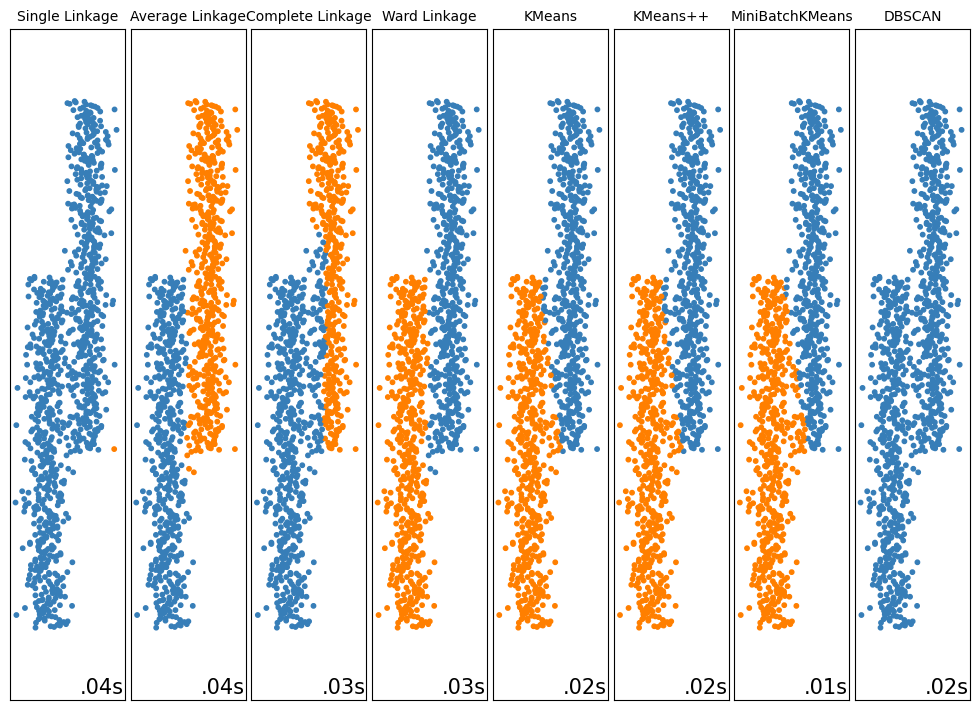

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(10, 7))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

ward = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="ward"
)
complete = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="complete"
)
average = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="average"
)
single = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="single"
)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeansplusplus = KMeans(n_clusters=2, init='k-means++', random_state=0)
MBkmeans = MiniBatchKMeans(n_clusters=2, init='k-means++', random_state=0, batch_size=3)
dbscan = DBSCAN(eps=3, min_samples=2)

clustering_algorithms = (
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward),
    ("KMeans", kmeans),
    ("KMeans++", kmeansplusplus),
    ("MiniBatchKMeans", MBkmeans),
    ("DBSCAN", dbscan),
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()

        # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
    algorithm.fit(Data)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(Data)

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=10)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    plt.scatter(Data[:, 0], Data[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1
plt.show()

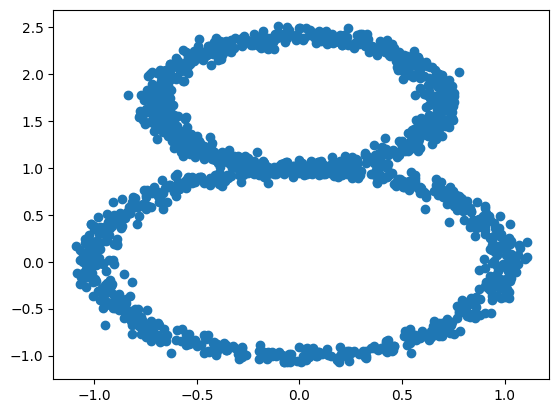

In [ ]:
n_samples = 1500
X, y = datasets.make_circles(n_samples=1500, factor=0.7, noise=0.05, random_state=170)

X[y == 1, 0] += 1.7

plt.scatter(X[:,1], X[:,0])

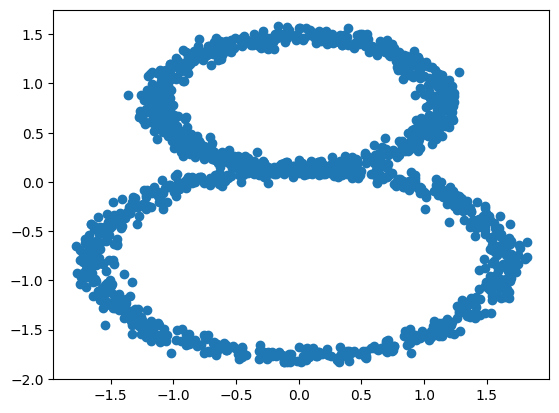

In [ ]:
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 1], X[:, 0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


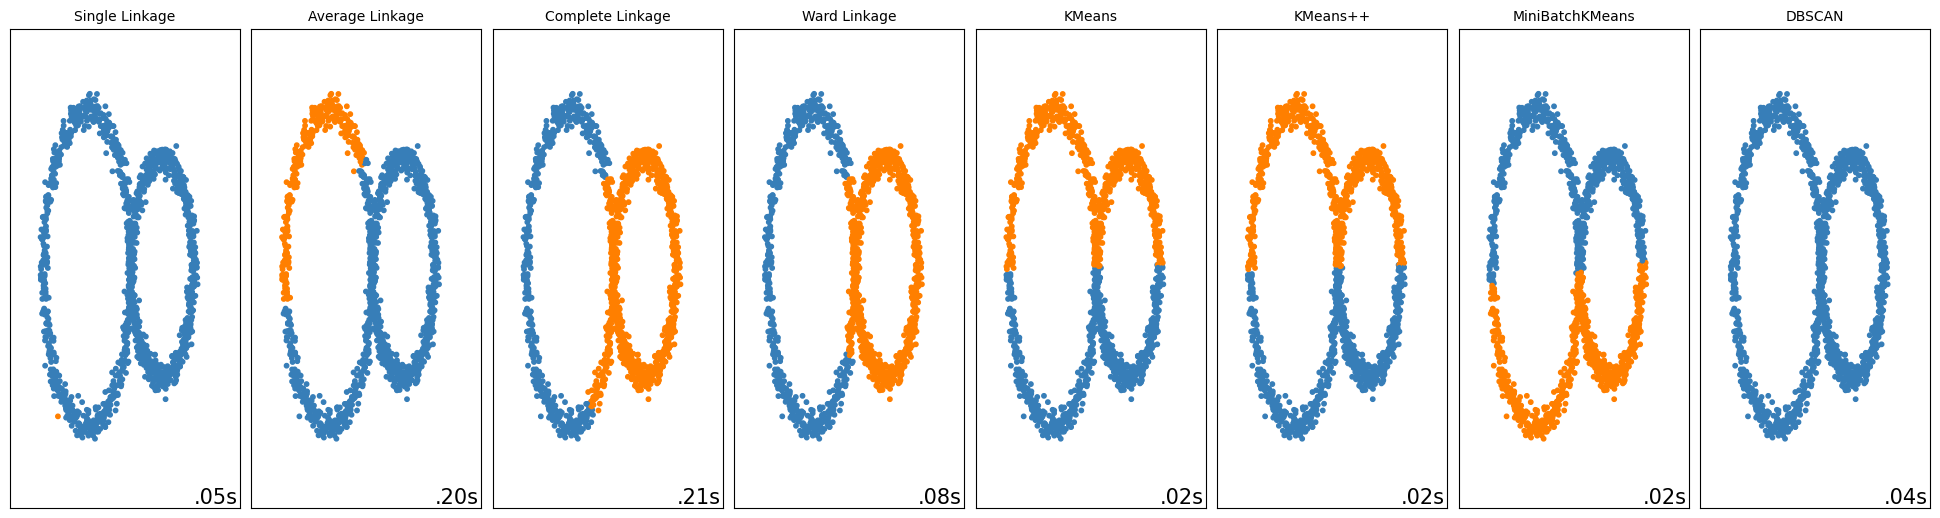

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(20, 5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

ward = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="ward"
)
complete = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="complete"
)
average = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="average"
)
single = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="single"
)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeansplusplus = KMeans(n_clusters=2, init='k-means++', random_state=0)
MBkmeans = MiniBatchKMeans(n_clusters=2, init='k-means++', random_state=0, batch_size=3)
dbscan = DBSCAN(eps=3, min_samples=2)

clustering_algorithms = (
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward),
    ("KMeans", kmeans),
    ("KMeans++", kmeansplusplus),
    ("MiniBatchKMeans", MBkmeans),
    ("DBSCAN", dbscan),
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()

        # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
    algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=10)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1
plt.show()

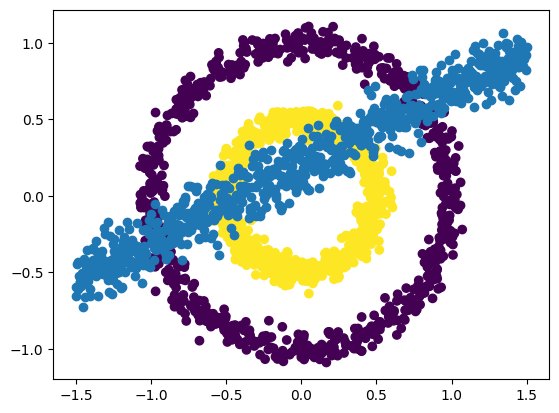

In [ ]:
X, Y = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=170)


x = np.linspace(-1.5, 1.5, 750)
y = 0.5 * x + 0.2

noise_level = 0.1
y += noise_level * np.random.randn(len(x))

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(x, y)

In [ ]:
otr = np.column_stack((x, y))


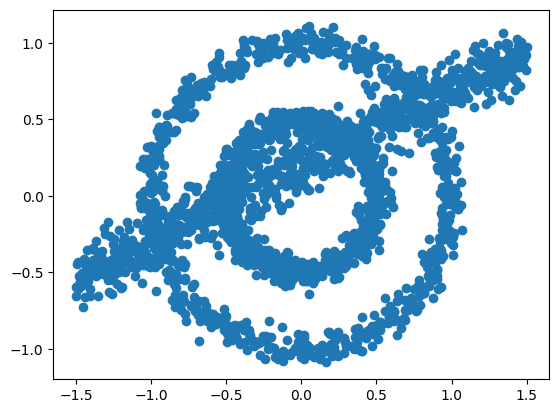

In [ ]:
data = np.concatenate((otr, X))
plt.scatter(data[:, 0], data[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


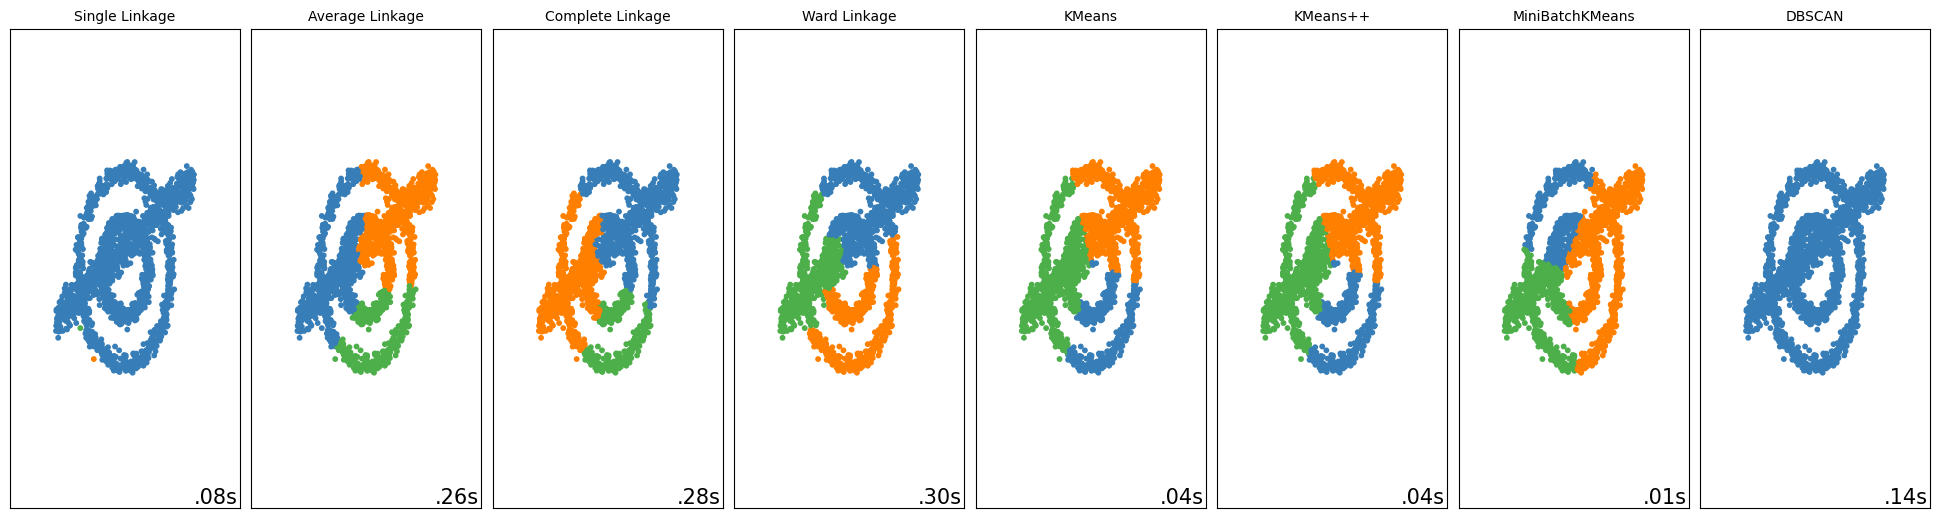

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(20, 5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

ward = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="ward"
)
complete = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="complete"
)
average = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="average"
)
single = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="single"
)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeansplusplus = KMeans(n_clusters=3, init='k-means++', random_state=0)
MBkmeans = MiniBatchKMeans(n_clusters=3, init='k-means++', random_state=0, batch_size=3)
dbscan = DBSCAN(eps=3, min_samples=2)

clustering_algorithms = (
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward),
    ("KMeans", kmeans),
    ("KMeans++", kmeansplusplus),
    ("MiniBatchKMeans", MBkmeans),
    ("DBSCAN", dbscan),
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()

        # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
    algorithm.fit(data)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(data)

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=10)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    plt.scatter(data[:, 0], data[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1
plt.show()

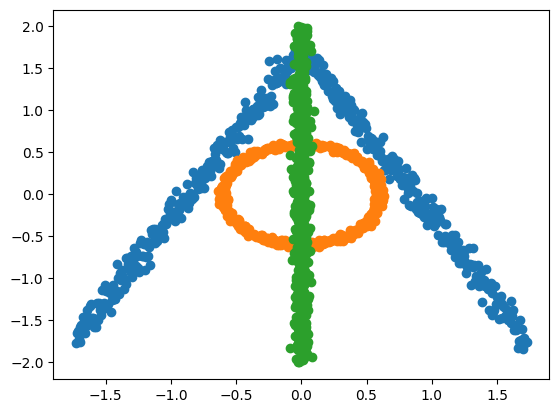

In [ ]:
size = 500
noise_level = 0.03
radius = 0.6
length = 4


#плащь-невидимка
x = np.linspace(0, size, size)
y = np.zeros_like(x)
y[0:size // 2] = x[0:size // 2] * 2 / size
y[size // 2:] = 2 - x[size // 2:] * 2 / size
noise = np.random.normal(0, noise_level, size)
y += noise
tr = np.column_stack((x, y))
tr = StandardScaler().fit_transform(tr)
plt.scatter(tr[:, 0], tr[:, 1])


#философский камень
theta = np.linspace(0, 2 * np.pi, size)
x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)
noise_x = np.random.normal(0, noise_level * radius, size)
noise_y = np.random.normal(0, noise_level * radius, size)
x1 += noise_x
y1 += noise_y
okr = np.column_stack((x1, y1))
plt.scatter(okr[:, 0], okr[:, 1])


#бузинная палочка
y2 = np.linspace(0, length, size)
x2 = np.zeros_like(y)
noise_x = np.random.normal(0, noise_level, size)
x2 += noise_x
y2 -= 2
otr = np.column_stack((x2, y2))
plt.scatter(otr[:, 0], otr[:, 1])

plt.show()

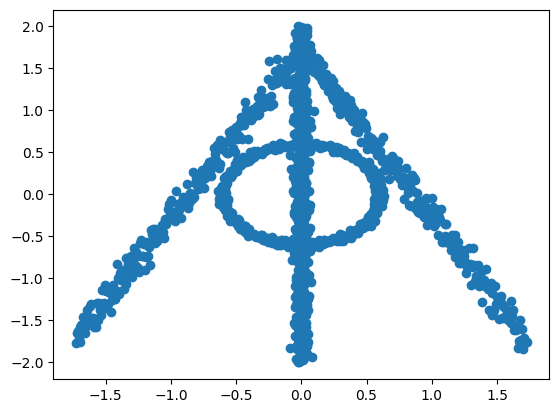

In [ ]:
data = np.concatenate((tr, otr))
data = np.concatenate((data, okr))
plt.scatter(data[:, 0], data[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


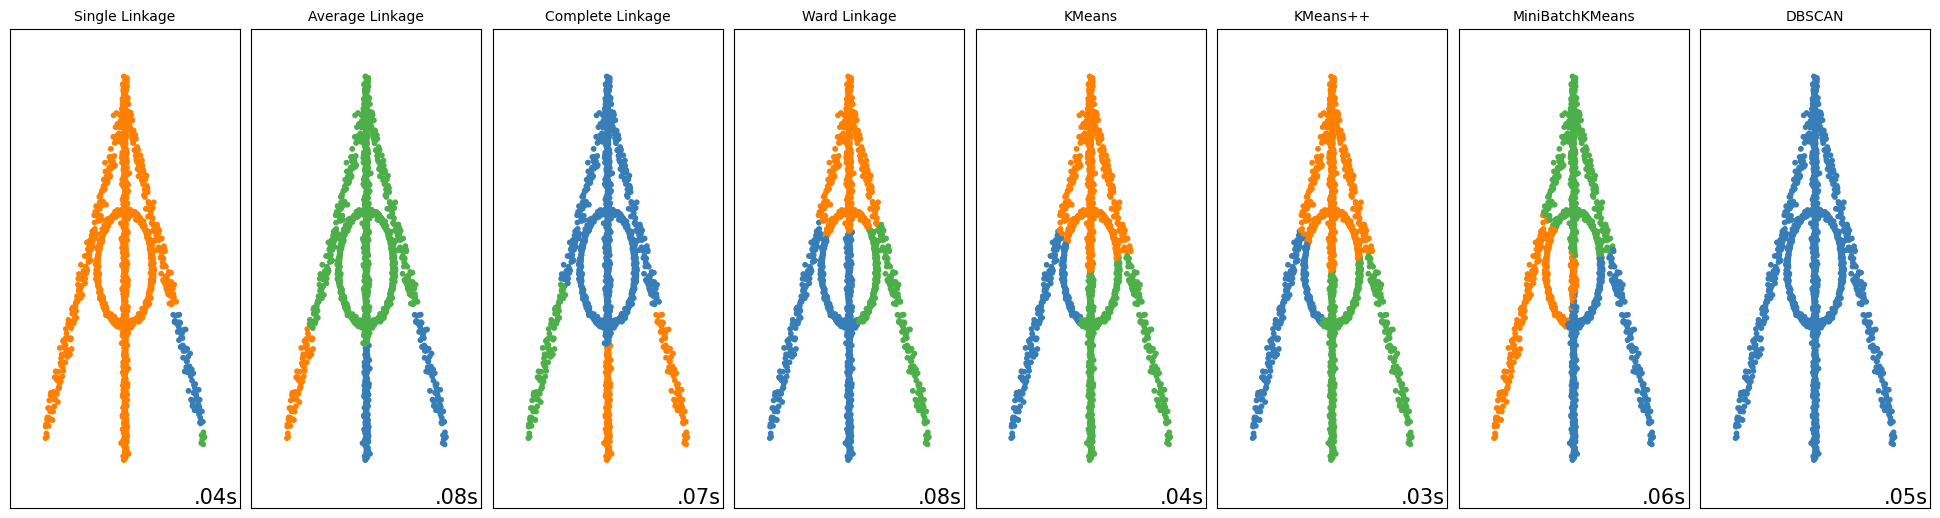

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(20, 5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

ward = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="ward"
)
complete = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="complete"
)
average = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="average"
)
single = cluster.AgglomerativeClustering(
    n_clusters=3, linkage="single"
)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeansplusplus = KMeans(n_clusters=3, init='k-means++', random_state=0)
MBkmeans = MiniBatchKMeans(n_clusters=3, init='k-means++', random_state=0, batch_size=3)
dbscan = DBSCAN(eps=3, min_samples=2)

clustering_algorithms = (
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward),
    ("KMeans", kmeans),
    ("KMeans++", kmeansplusplus),
    ("MiniBatchKMeans", MBkmeans),
    ("DBSCAN", dbscan),
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()

        # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
    algorithm.fit(data)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(data)

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=10)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    plt.scatter(data[:, 0], data[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1
plt.show()